In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
n_samples=1000
x,y = make_classification(n_samples=n_samples,n_features=2,\
n_informative=2,n_redundant=0,n_repeated=0,n_classes=3,n_clusters_per_class=1,class_sep=2,random_state=1)

Text(0, 0.5, '$x2$')

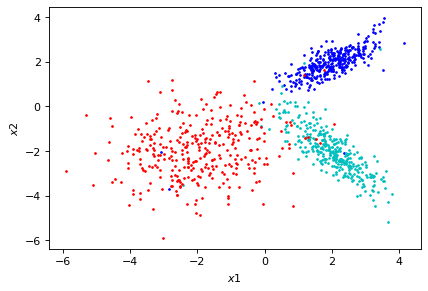

In [3]:
#数据
x0=np.array([x[i] for i in range(n_samples) if y[i]==0])
x1=np.array([x[i] for i in range(n_samples) if y[i]==1])
x2=np.array([x[i] for i in range(n_samples) if y[i]==2])
plt.figure(dpi=80)
plt.scatter(x0[:,0],x0[:,1],s=2,color='b')
plt.scatter(x1[:,0],x1[:,1],s=2,color='c')
plt.scatter(x2[:,0],x2[:,1],s=2,color='r')
plt.xlabel(r'$x1$')
plt.ylabel(r'$x2$')

In [4]:
#训练数据和测试数据
x_train = x[:800]
x_test = x[800:]
y_train = y[:800]
y_test = y[800:]

Text(0, 0.5, 'acc %')

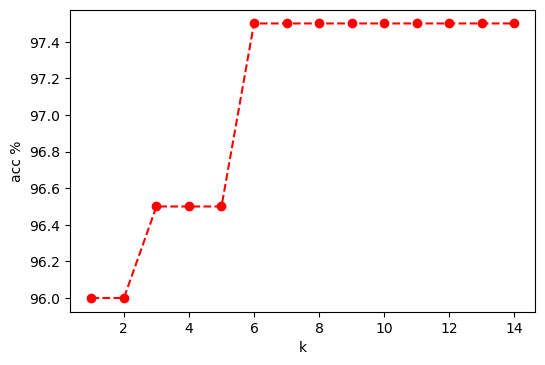

In [5]:
#使用kd数构造k近邻分类器
from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import KDTree
from collections import Counter
dist=DistanceMetric.get_metric('minkowski',p=2)#定义距离
kdt = KDTree(x_train,metric=dist)#构造kd树
ACC=[]
K=[]
for k in np.arange(1,15,1):
    index=kdt.query(x_test,return_distance=False,k=k)#返回k个最近邻样本的索引
    y_predict=np.array([i.most_common(n=1)[0][0] for i \
                        in map(Counter,y_train[index])])#根据k个最近邻样本的多数类预测测试点的类别
    acc=100*(Counter(y_predict-y_test)[0])/len(y_predict)
    #print('acc:{}%'.format(acc)#打印预测准确度
    ACC.append(acc)
    K.append(k)
plt.figure(dpi=100)
plt.plot(K,ACC,'ro--')
plt.xlabel('k')
plt.ylabel('acc %')

Text(0, 0.5, 'acc %')

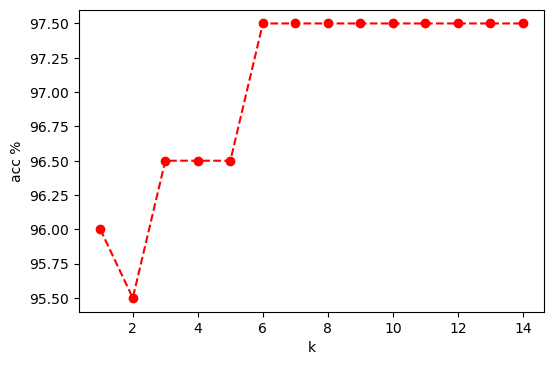

In [6]:
#使用sklearn直接写好的k近邻分类器
from sklearn.neighbors import KNeighborsClassifier
ACC=[]
K=[]
for k in np.arange(1,15,1):
    knn=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2,algorithm='kd_tree')#定义knn
    knn.fit(x_train,y_train)#使用训练数据划分特征空间
    y_predict=knn.predict(x_test)#预测
    acc=100*(Counter(y_predict-y_test)[0])/len(y_predict)
    ACC.append(acc)
    K.append(k)
plt.figure(dpi=100)
plt.plot(K,ACC,'ro--')
plt.xlabel('k')
plt.ylabel('acc %')